# fxローソク足チャートをプロット

* csvファイルからfxヒストリカルデータを読み出し
* `matplotlib.finance` を利用してローソク足チャートをプロット

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [3]:
csv=pd.read_csv('USDJPY60.csv',
                 sep=',',
                 names=('YY.MM.DD', 'HH:MM', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'),
                 index_col=['YY.MM.DD', 'HH:MM'])

In [4]:
data=csv
#data=csv['2016.11.08':'2016.11.11']
data

OPEN     HIGH      LOW    CLOSE  VOLUME
YY.MM.DD   HH:MM                                            
2016.08.05 22:00  101.738  101.813  101.733  101.753     615
           23:00  101.750  101.825  101.732  101.778    1091
2016.08.08 00:00  101.959  102.000  101.845  101.906    1652
           01:00  101.906  102.257  101.852  102.230    2419
           02:00  102.228  102.253  102.042  102.053    1374
           03:00  102.053  102.141  101.911  102.099    2308
           04:00  102.096  102.143  102.020  102.142    1296
           05:00  102.138  102.144  101.976  102.036     695
           06:00  102.037  102.069  101.926  102.011     730
           07:00  102.014  102.059  101.954  102.004     546
           08:00  102.000  102.083  101.983  102.072     639
           09:00  102.077  102.196  102.032  102.185     738
           10:00  102.182  102.306  102.102  102.291    1393
           11:00  102.288  102.328  102.212  102.277    1063
           12:00  102.278  102.454  102.246  102.396    1090
           13:00  102.400  102.431  102.310  102.330     900
           14:00  102.327  102.417  102.307  102.409     614
           15:00  102.413  102.488  102.388  102.483     876
           16:00  102.486  102.652  102.463  102.573    1275
           17:00  102.577  102.578  102.434  102.525    1324
           18:00  102.528  102.620  102.521  102.530     869
           19:00  102.528  102.568  102.494  102.568     202
           20:00  102.571  102.585  102.471  102.489     257
           21:00  102.492  102.500  102.358  102.478     421
           22:00  102.476  102.485  102.416  102.435     321
           23:00  102.438  102.464  102.426  102.447     239
2016.08.09 00:00  102.363  102.492  102.359  102.401    1210
           01:00  102.401  102.468  102.391  102.448     472
           02:00  102.447  102.447  102.268  102.283     752
           03:00  102.284  102.397  102.278  102.361    1090
...                   ...      ...      ...      ...     ...
2017.02.16 18:00  113.333  113.367  113.124  113.351    4418
           19:00  113.354  113.442  113.261  113.358    1652
           20:00  113.362  113.472  113.225  113.318    2172
           21:00  113.321  113.358  113.075  113.110    1776
           22:00  113.111  113.246  113.087  113.233    1431
           23:00  113.236  113.273  113.215  113.241     446
2017.02.17 00:00  113.228  113.321  113.161  113.286    1547
           01:00  113.286  113.340  113.227  113.318    1003
           02:00  113.315  113.489  113.240  113.408    2410
           03:00  113.408  113.501  113.375  113.458    1515
           04:00  113.454  113.480  113.401  113.442     931
           05:00  113.447  113.458  113.267  113.289    1325
           06:00  113.293  113.412  113.288  113.333    1063
           07:00  113.333  113.432  113.333  113.377     896
           08:00  113.377  113.410  113.318  113.376     921
           09:00  113.376  113.468  113.318  113.417    1498
           10:00  113.417  113.434  113.131  113.177    2398
           11:00  113.174  113.199  112.815  112.924    3175
           12:00  112.927  112.935  112.697  112.859    2751
           13:00  112.862  113.004  112.817  112.890    1660
           14:00  112.894  112.937  112.755  112.851    1716
           15:00  112.853  112.874  112.616  112.780    2580
           16:00  112.778  112.931  112.734  112.818    3275
           17:00  112.818  112.973  112.733  112.828    3998
           18:00  112.824  112.920  112.730  112.871    2380
           19:00  112.867  112.896  112.773  112.838    1257
           20:00  112.842  112.885  112.795  112.856     779
           21:00  112.853  112.966  112.849  112.930     843
           22:00  112.926  112.942  112.872  112.919     929
           23:00  112.916  112.918  112.739  112.767    1269

[3312 rows x 5 columns]

In [5]:
date=[]
quote = []
for i, v in data.iterrows():
    t = pd.to_datetime(i[0] + ' ' + i[1]);
    date.append(t)
    quote.append((date2num(t), v['OPEN'], v['CLOSE'], v['HIGH'], v['LOW']))

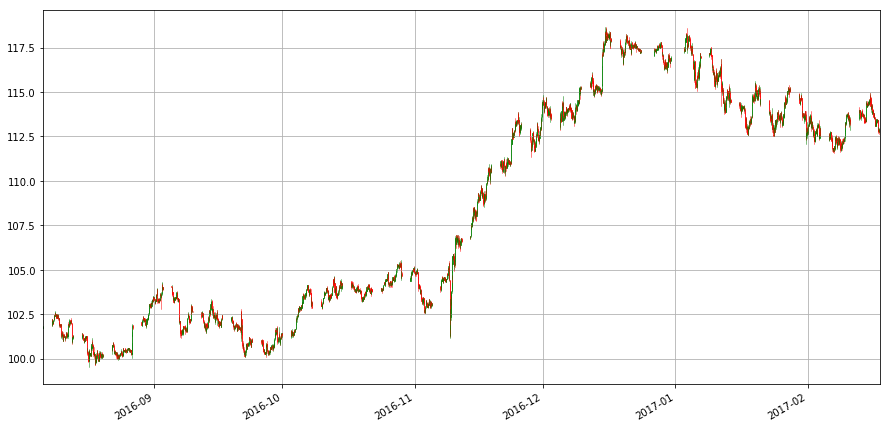

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_xlim(date[0], date[-1])
mf.candlestick_ochl(ax, quote, width=0.02, colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()
plt.show()